In [1]:
install.packages("randomForest")
#library need 
library(randomForest)
set.seed(123)
setwd("C:/Users/JunHau96/Documents/PM_Assignment")
kd_cleaned = read.csv("cleaned_csv_result-chronic_kidney_disease_full.csv")

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\JunHau96\AppData\Local\Temp\Rtmp6ND9rd\downloaded_packages


Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [2]:
data1 = sort(sample(nrow(kd_cleaned), nrow(kd_cleaned)*.7))
#creating training data set by selecting the output row values
kd_train=kd_cleaned[data1,]

#creating test data set by not selecting the output row values
kd_test=kd_cleaned[-data1,]
forest_train=kd_train
forest_test=kd_test

In [3]:
bag.d1 = randomForest(X.class.~.-X,data=forest_train,,importance=TRUE)
bag.d1

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


Call:
 randomForest(formula = X.class. ~ . - X, data = forest_train,      , importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 0.006545747
                    % Var explained: 97.26

In [4]:
prediction1 = predict(bag.d1, forest_test)
matrix1 = table(prediction1, forest_test$X.class.)

In [5]:
matrix1

                      
prediction1             0  1
  2.04081632651221e-05  2  0
  2.04081632651238e-05  1  0
  2.04081632651365e-05  1  0
  2.04081632651456e-05  1  0
  2.04081632651609e-05  1  0
  0.000131519274376237  1  0
  0.000520408163265137  1  0
  0.000687074829931823  1  0
  0.000820408163265145  1  0
  0.00102040816326513   1  0
  0.00102040816326514   2  0
  0.00213151927437627   1  0
  0.00279818594104291   1  0
  0.00302040816326515   1  0
  0.00308390022675722   1  0
  0.00308707482993181   1  0
  0.00335374149659847   1  0
  0.0034537414965985    1  0
  0.00368707482993182   1  0
  0.00516485260770963   1  0
  0.00542040816326521   1  0
  0.00618707482993192   1  0
  0.00952040816326523   1  0
  0.00995374149659855   1  0
  0.0110870748299319    1  0
  0.0120870748299319    1  0
  0.0144204081632653    1  0
  0.014987074829932     1  0
  0.0163537414965986    1  0
  0.0201981859410431    1  0
  0.0205537414965986    1  0
  0.0211981859410431    1  0
  0.021650566893424 

,%IncMSE,IncNodePurity
X.age.,3.550658e+00,5.191051e-01
X.bp.,6.290349e+00,4.679153e-01
X.sg.,4.915905e+01,1.423632e+01
X.al.,2.951560e+01,1.419030e+01
X.su.,1.098827e+01,5.425115e-01
X.pc.,6.477863e+00,3.603317e-01
X.pcc.,1.001002e+00,1.915834e-03
X.ba.,-7.812799e-38,7.327472e-17
X.bgr.,9.097925e+00,9.326923e-01
X.bu.,6.713922e+00,1.150934e+00


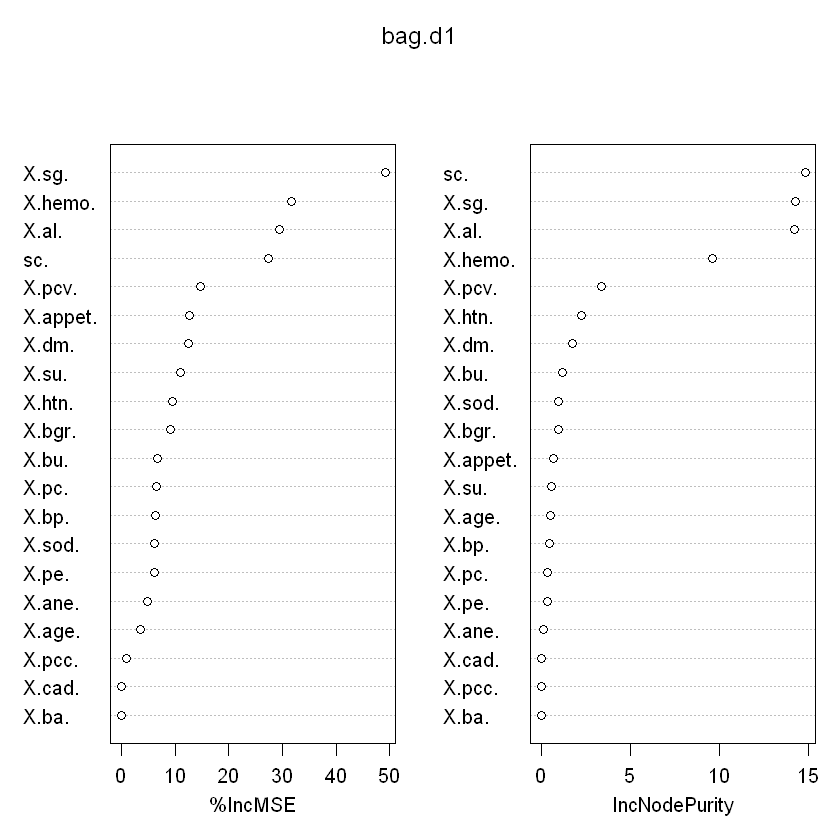

In [6]:
importance(bag.d1)
varImpPlot(bag.d1)

In [7]:
#Finding the confusion matrix for forest
confusion_table1= table(prediction1, forest_test$X.class.)
Accuracy=sum(diag(confusion_table1))/sum(confusion_table1)
Sensitivity=confusion_table1[1,1]/sum(confusion_table1[,1])
Specificity=confusion_table1[2,2]/sum(confusion_table1[,2])
PPV=confusion_table1[1,1]/sum(confusion_table1[1,])
NPV=confusion_table1[2,2]/sum(confusion_table1[2,])
FPR=1-Specificity
FNR=1-Sensitivity


In [9]:
cat("Confusion Matrix for Forest\n")
confusion_table1
cat("Accuracy:",Accuracy,"\n")
cat("Sensitivity:",Sensitivity,"\n")
cat("Specificity:",Specificity,"\n")
cat("Positive Predictive Value(PPV):",PPV,"\n")
cat("Negative Predictive Value(NPV):",NPV,"\n")
cat("False Positive Rate:",FPR,"\n")
cat("False Negative Rate:",FNR,"\n")

Confusion Matrix for Forest


                      
prediction1             0  1
  2.04081632651221e-05  2  0
  2.04081632651238e-05  1  0
  2.04081632651365e-05  1  0
  2.04081632651456e-05  1  0
  2.04081632651609e-05  1  0
  0.000131519274376237  1  0
  0.000520408163265137  1  0
  0.000687074829931823  1  0
  0.000820408163265145  1  0
  0.00102040816326513   1  0
  0.00102040816326514   2  0
  0.00213151927437627   1  0
  0.00279818594104291   1  0
  0.00302040816326515   1  0
  0.00308390022675722   1  0
  0.00308707482993181   1  0
  0.00335374149659847   1  0
  0.0034537414965985    1  0
  0.00368707482993182   1  0
  0.00516485260770963   1  0
  0.00542040816326521   1  0
  0.00618707482993192   1  0
  0.00952040816326523   1  0
  0.00995374149659855   1  0
  0.0110870748299319    1  0
  0.0120870748299319    1  0
  0.0144204081632653    1  0
  0.014987074829932     1  0
  0.0163537414965986    1  0
  0.0201981859410431    1  0
  0.0205537414965986    1  0
  0.0211981859410431    1  0
  0.021650566893424 

Accuracy: 0.01666667 
Sensitivity: 0.05 
Specificity: 0 
Positive Predictive Value(PPV): 1 
Negative Predictive Value(NPV): 0 
False Positive Rate: 1 
False Negative Rate: 0.95 
